Question 1

Task 1:
Link of my notebook on kaggle  https://www.kaggle.com/fireshadow0502/simple-linear-regression

Task 2:
Kaggle notebook link https://www.kaggle.com/code/fireshadow0502/notebook9683a4487b

Question 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from scipy.stats import mode

In [2]:
data = pd.read_csv('pendigits.tra',header = None)
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

In [3]:
# this code can be used to print the first digit corresponding to each class by replacing the no. in the for loop
def PrintDigit(n):

    t = 0
    for i in range(7494):
        if(data.iloc[i,16]==n):
            t = i
            break
        
    x = data.iloc[t,0:16:2]    
    y = data.iloc[t,1:16:2]
    return x,y

In [4]:
%matplotlib inline
x_0,y_0 =  PrintDigit(0)
x_4,y_4 =  PrintDigit(4)
x_8,y_8 =  PrintDigit(8)

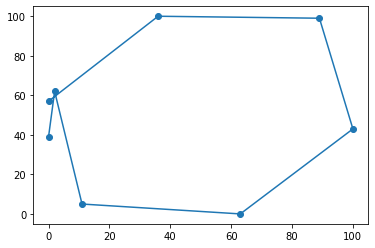

In [5]:
plt.scatter(x_0,y_0)
plt.plot(x_0,y_0)

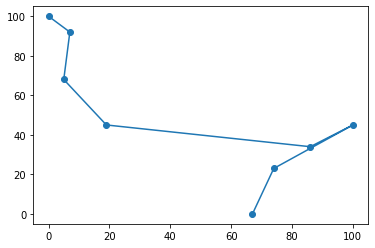

In [6]:
plt.scatter(x_4,y_4)
plt.plot(x_4,y_4)

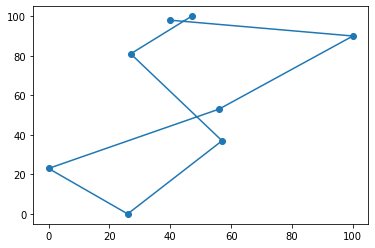

In [7]:
plt.scatter(x_8,y_8)
plt.plot(x_8,y_8)

In [8]:
X_train = np.array(data.iloc[:,0:-1])
y_train = np.array(data.iloc[:,-1])

In [9]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter = 10000).fit(X_train,y_train)

/home/fireshadow/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
data_test = pd.read_csv('pendigits.tes',header = None)
X_test = np.array(data_test.iloc[:,0:-1])
y_test = np.array(data_test.iloc[:,-1])

In [11]:
log.score(X_test,y_test)

0.9268153230417381

In [12]:
class KNN:
    def __init__(self, k):
        self.k = k
        self.x = None
        self.y = None
        
    def load(self, dataset):
        #dataset is a pandas dataframe
        self.x = np.array(dataset.iloc[:,0:-1])
        self.y = np.array(dataset.iloc[:,-1])
    def distance(self, p1, p2):
        dist = np.sqrt(np.sum((p1-p2)**2))
        return dist             
    def predict(self, test_point):
        y_predict = []
        for i in range(len(test_point)):
            distances = []        
            for j in range(len(self.x)):
                d = self.distance(np.array(self.x[j,:]),test_point[i,:])
                distances.append(d)
            distances = np.array(distances)
            index = np.argsort(distances)[:self.k]
            k_neigh = self.y[index]
            value = mode(k_neigh)
            t = value.mode[0]
            y_predict.append(t)
        y_predict = np.array(y_predict)
        return y_predict

In [13]:
classf = KNN(1)
classf.load(data)

In [14]:
from sklearn.metrics import accuracy_score
y_p = classf.predict(X_test)
print(accuracy_score(y_test,y_p))

0.9774156660949114


In [15]:
k = []
err = []
for i in range (1,12):
    classf = KNN(i)
    classf.load(data)
    y_predict = classf.predict(X_test)
    err.append(accuracy_score(y_test,y_predict))
    k.append(i)

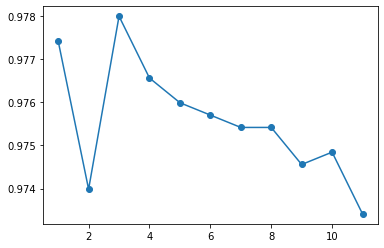

In [18]:
plt.scatter(k,err)
plt.plot(k,err)
plt.show()

above graph shows that the best value of k will be 3 for the range 1 to 11

Using test accuracy to decide hyperparameters can lead to overfitting of our test data especially in case of imbalanced classes. 